# **Curso** : Python para Data Science

**Sesión 02.2**
Programación con Numpy y Pandas

**Profesor**:
* Ing. Cristhian Castro Chávez
* castro.ca@pucp.pe

In [2]:
# Importamos las librerías
import numpy as np
import pandas as pd

### 2.4 Pandas -  Series y DataFrames

**Series de Pandas**
* Una Serie de Pandas es una matriz/lista unidimensional etiquetada capaz de contener datos de cualquier tipo (enteros, cadenas, flotantes, objetos de Python, etc.).
* Las etiquetas se llaman colectivamente índice.
* Una Serie de Pandas se puede pensar como una sola columna de una hoja de cálculo de Excel y cada entrada en una serie corresponde a una fila individual en la hoja de cálculo.

In [3]:
# Creamos una lista de precios de diferentes medicinas
med_price_list = [55,25,75,40,90]

# Convertimos la lista a un array numpy
med_price_arr = np.array(med_price_list)

# Convertimos ambos, la lista y el array numpy a una Serie Pandas
series_list = pd.Series(med_price_list)
series_arr = pd.Series(med_price_arr)

# printing the converted series object
print(series_list)
print(series_arr)

0    55
1    25
2    75
3    40
4    90
dtype: int64
0    55
1    25
2    75
3    40
4    90
dtype: int64


* Podemos ver que la lista y el array se han convertido en un objeto Serie de Pandas.
* También observamos que la serie ha obtenido automáticamente etiquetas de índice. Veamos cómo se pueden modificar estas etiquetas.

In [4]:
# Cambiando los índices de las series
med_price_list_labeled = pd.Series(med_price_list, index = ['Omeprazole','Azithromycin','Metformin','Ibuprofen','Cetirizine'])
print(med_price_list_labeled)

Omeprazole      55
Azithromycin    25
Metformin       75
Ibuprofen       40
Cetirizine      90
dtype: int64


**Realizando operaciones matemáticas en Series de Pandas**

* El precio de cada medicamento se incrementó en $2.5. Vamos a sumarlo al precio existente.

In [5]:
# Añadimos 2.5
med_price_list_labeled_updated = med_price_list_labeled + 2.5
med_price_list_labeled_updated

Omeprazole      57.5
Azithromycin    27.5
Metformin       77.5
Ibuprofen       42.5
Cetirizine      92.5
dtype: float64

* Los proveedores han publicado una nueva lista de precios para cada medicamento. Vamos a encontrar la diferencia entre el nuevo precio y el precio anterior."

In [6]:
new_price_list = [77, 45.5, 100, 50, 80]
new_price_list_labeled = pd.Series(new_price_list, index = ['Omeprazole','Azithromycin','Metformin','Ibuprofen','Cetirizine'])
print(new_price_list_labeled)

Omeprazole       77.0
Azithromycin     45.5
Metformin       100.0
Ibuprofen        50.0
Cetirizine       80.0
dtype: float64


In [7]:
print('Diferencia entre el nuevo precio y el anterior')
print(new_price_list_labeled - med_price_list_labeled_updated)

Diferencia entre el nuevo precio y el anterior
Omeprazole      19.5
Azithromycin    18.0
Metformin       22.5
Ibuprofen        7.5
Cetirizine     -12.5
dtype: float64


**Pandas DataFrame**

El DataFrame de Pandas es una estructura de datos tabular bidimensional con ejes etiquetados (filas y columnas).

**Creando un dataframe a partir de una lista**

In [8]:
student = ['María', 'Pedro', 'Susana', 'Juan', 'Marcos']
df1 = pd.DataFrame(student,columns=['Student'])
df1

,Student
0,María
1,Pedro
2,Susana
3,Juan
4,Marcos


**Creando un dataframe a partir de un diccionario**

In [9]:
#  Definimos otra lista
grades = ['B-','A+','A-', 'B+', 'C']

# Creamos el dataframe
df2 = pd.DataFrame({'Student':student,'Grade':grades})
df2

,Student,Grade
0,María,B-
1,Pedro,A+
2,Susana,A-
3,Juan,B+
4,Marcos,C


from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('Student').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('Grade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Grade'].value_counts()
    for x_label, grp in df2.groupby('Student')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Student')
_ = plt.ylabel('Grade')

**Creando un dataframe usando Series**

Los datos de consumo total de energía para Estados Unidos se recopilaron desde 2012 hasta 2018. Veamos cómo estos datos pueden presentarse en forma de DataFrame.

In [10]:
year = pd.Series([2012,2013,2014,2015,2016,2017,2018])
energy_consumption = pd.Series([2152,2196,2217,2194,2172,2180,2258])

df3 = pd.DataFrame({'Year':year,'Energy_Consumption(Mtoe)':energy_consumption})
df3

,Year,Energy_Consumption(Mtoe)
0,2012,2152
1,2013,2196
2,2014,2217
3,2015,2194
4,2016,2172
5,2017,2180
6,2018,2258


**Creando un dataframe usando valores alteatorios**

Con fines de encriptación, una compañía de navegadores web desea generar valores aleatorios con una media igual a 0 y una varianza igual a 1. Desean obtener 5 números generados al azar en 2 pruebas diferentes."

In [11]:
# Creamos el daframe
df4 = pd.DataFrame(np.random.randn(5,2),columns = ['Trial 1', 'Trial 2'])
df4

,Trial 1,Trial 2
0,2.121411,-1.361615
1,1.725904,0.475728
2,0.476841,0.233791
3,-0.015368,-0.322421
4,0.166851,0.694276


### 2.5 Pandas - Accediendo y modificando elementos

**Accediendo Series**

Se recopiló la facturación (en miles de millones de dólares) de diferentes operadores de telecomunicaciones en los Estados Unidos para el año 2020. Las siguientes listas contienen los nombres de los operadores de telecomunicaciones y sus respectivas facturaciones (en miles de millones de dólares)."

In [12]:
operators = ['AT&T', 'Verizon', 'T-Mobile US', 'US Cellular']
revenue = [171.76, 128.29, 68.4, 4.04]

#Creamos un Pandas series a partir de listas
telecom = pd.Series(revenue, index=operators)
telecom

AT&T           171.76
Verizon        128.29
T-Mobile US     68.40
US Cellular      4.04
dtype: float64

**Accessing Pandas Series using its index**

In [13]:
# Accedemos al primer elemento
telecom[0]

171.76

In [ ]:
#  Accedemos a los primeros 3 elementos
telecom[:3]

AT&T           171.76
Verizon        128.29
T-Mobile US     68.40
dtype: float64

In [ ]:
# Accedemos a los 2 últimos elementos
telecom[-2:]

T-Mobile US    68.40
US Cellular     4.04
dtype: float64

**Accediendo a Series de Pandas utilizando su índice**

In [ ]:
telecom['AT&T']

171.76

In [ ]:
# Accedemos a los 3 primers elementos
telecom[:'T-Mobile US']

AT&T           171.76
Verizon        128.29
T-Mobile US     68.40
dtype: float64

In [ ]:
# Accedemos a múltiplos valores
telecom[['AT&T','US Cellular','Verizon']]

AT&T           171.76
US Cellular      4.04
Verizon        128.29
dtype: float64

**Accessing DataFrames**

Se recopilaron los datos de los clientes que visitaron las tiendas 24/7 desde diferentes ubicaciones. Los datos incluyen el ID del cliente, la ubicación de la tienda, el género del cliente, el tipo de producto comprado, la cantidad de productos comprados y el monto total de la factura. Creemos el conjunto de datos y veamos cómo acceder a diferentes entradas del mismo.

In [14]:
# Creamos un dataframe usando diccionario
store_data = pd.DataFrame({'CustomerID': ['CustID00','CustID01','CustID02','CustID03','CustID04']
                           ,'location': ['Chicago', 'Boston', 'Seattle', 'San Francisco', 'Austin']
                           ,'gender': ['M','M','F','M','F']
                           ,'type': ['Electronics','Food&Beverages','Food&Beverages','Medicine','Beauty']
                           ,'quantity':[1,3,4,2,1],'total_bill':[100,75,125,50,80]})
store_data

,CustomerID,location,gender,type,quantity,total_bill
0,CustID00,Chicago,M,Electronics,1,100
1,CustID01,Boston,M,Food&Beverages,3,75
2,CustID02,Seattle,F,Food&Beverages,4,125
3,CustID03,San Francisco,M,Medicine,2,50
4,CustID04,Austin,F,Beauty,1,80


In [15]:
# Accedemos a la primera fila
store_data[:1]

,CustomerID,location,gender,type,quantity,total_bill
0,CustID00,Chicago,M,Electronics,1,100


In [16]:
# Accedemos a la primera columna
store_data['location']

0          Chicago
1           Boston
2          Seattle
3    San Francisco
4           Austin
Name: location, dtype: object

In [17]:
# Accedemos solo a las filas pares
store_data[::2]

,CustomerID,location,gender,type,quantity,total_bill
0,CustID00,Chicago,M,Electronics,1,100
2,CustID02,Seattle,F,Food&Beverages,4,125
4,CustID04,Austin,F,Beauty,1,80


**Usando loc - iloc**

**Método loc**

* loc es un método para acceder a filas y columnas en objetos pandas. Cuando utilizamos el método loc en un dataframe, especificamos qué filas y qué columnas deseamos utilizando el siguiente formato:

  * **dataframe.loc[selección de filas, selección de columnas]**

* El método DataFrame.loc[] es un método que toma **solo etiquetas de índice** y devuelve una fila o un dataframe si la etiqueta de índice existe en el dataframe de datos.

In [18]:
# Accediendo al valor del primer índice utilizando el método 'loc' (la indexación comienza desde 0 en Python)
store_data.loc[1]

CustomerID          CustID01
location              Boston
gender                     M
type          Food&Beverages
quantity                   3
total_bill                75
Name: 1, dtype: object

**Acceso a filas y columnas seleccionadas utilizando el método 'loc'**

In [20]:
# Accediendo a los valores de los índices 1 y 4 junto con las columnas de ubicación y tipo.
store_data.loc[[1,4],['location','type']]

,location,type
1,Boston,Food&Beverages
4,Austin,Beauty


**Método iloc**

* El indexador iloc para los DataFrames de Pandas se utiliza para la selección/indexación basada en la **ubicación de enteros** por posición. Al usar el método iloc en un DataFrame, especificamos qué filas y qué columnas queremos seleccionar utilizando el siguiente formato:

  * **dataframe.iloc[selección de filas, selección de columnas]**



In [ ]:
# Accediendo a filas y columnas seleccionadas utilizando el método iloc
store_data.iloc[[1,4],[0,2]]

,CustomerID,gender
1,CustID01,M
4,CustID04,F


**Diferencia entre los métodos de indexación loc e iloc**

* loc se basa en etiquetas, lo que significa que debes especificar filas y columnas según sus etiquetas de fila y columna.
* iloc se basa en la posición de enteros, por lo que debes especificar filas y columnas por sus valores de posición de enteros (posición de enteros basada en 0).


Si utilizamos etiquetas en lugar de valores de índice en .iloc, se generará un error.

In [21]:
# Accediendo a filas y columnas seleccionadas utilizando el método iloc
store_data.iloc[[1,4],['location','type']]

IndexError: ignored

* As expected, .iloc has given error on using 'labels'.

Podemos modificar las entradas de un DataFrame utilizando los métodos loc o iloc.

In [22]:
print(store_data.loc[4,'type'])
store_data.loc[4,'type'] = 'Electronics'

Beauty


In [23]:
store_data

,CustomerID,location,gender,type,quantity,total_bill
0,CustID00,Chicago,M,Electronics,1,100
1,CustID01,Boston,M,Food&Beverages,3,75
2,CustID02,Seattle,F,Food&Beverages,4,125
3,CustID03,San Francisco,M,Medicine,2,50
4,CustID04,Austin,F,Electronics,1,80


In [ ]:
store_data.iloc[4,3] = 'Beauty'
store_data

,CustomerID,location,gender,type,quantity,total_bill
0,CustID00,Chicago,M,Electronics,1,100
1,CustID01,Boston,M,Food&Beverages,3,75
2,CustID02,Seattle,F,Food&Beverages,4,125
3,CustID03,San Francisco,M,Medicine,2,50
4,CustID04,Austin,F,Beauty,1,80


**Indexing basado en condiciones**

In [ ]:
store_data['quantity']>1

0    False
1     True
2     True
3     True
4    False
Name: quantity, dtype: bool

* Donde se cumple la condición de que la cantidad sea mayor que 1, se devuelve 'True'. Vamos a recuperar los valores originales donde se cumple esta condición."

In [ ]:
store_data.loc[store_data['quantity']>1]

,CustomerID,location,gender,type,quantity,total_bill
1,CustID01,Boston,M,Food&Beverages,3,75
2,CustID02,Seattle,F,Food&Beverages,4,125
3,CustID03,San Francisco,M,Medicine,2,50


* Donde se cumple la condición, obtenemos los valores originales, y donde la condición no se cumple, no obtenemos esos registros en la salida."

**Adición y eliminación de columnas en un DataFrame de Pandas**

**Agregando una nueva columna en un DataFrame**

In [ ]:
store_data

,CustomerID,location,gender,type,quantity,total_bill
0,CustID00,Chicago,M,Electronics,1,100
1,CustID01,Boston,M,Food&Beverages,3,75
2,CustID02,Seattle,F,Food&Beverages,4,125
3,CustID03,San Francisco,M,Medicine,2,50
4,CustID04,Austin,F,Beauty,1,80


In [ ]:
# Agregar una nueva columna en el DataFrame store_data que represente una calificación (en una escala del 1 al 5) otorgada por el cliente basada en su experiencia de compra.
store_data['rating'] = [2,5,3,4,4]
store_data

,CustomerID,location,gender,type,quantity,total_bill,rating
0,CustID00,Chicago,M,Electronics,1,100,2
1,CustID01,Boston,M,Food&Beverages,3,75,5
2,CustID02,Seattle,F,Food&Beverages,4,125,3
3,CustID03,San Francisco,M,Medicine,2,50,4
4,CustID04,Austin,F,Beauty,1,80,4


**Eliminando una columna de un DataFrame**

* La columna CustomerID es un identificador único de cada cliente. Este identificador único no ayudará a 24/7 Stores a obtener información útil sobre sus clientes. Por lo tanto, han decidido eliminar esta columna del DataFrame.

In [ ]:
store_data.drop('CustomerID',axis=1)

,location,gender,type,quantity,total_bill,rating
0,Chicago,M,Electronics,1,100,2
1,Boston,M,Food&Beverages,3,75,5
2,Seattle,F,Food&Beverages,4,125,3
3,San Francisco,M,Medicine,2,50,4
4,Austin,F,Beauty,1,80,4


* Hemos eliminado con éxito 'CustomerID' del DataFrame. Sin embargo, este cambio no es permanente en el DataFrame. Echemos un vistazo a store_data de nuevo."

In [ ]:
store_data

,CustomerID,location,gender,type,quantity,total_bill,rating
0,CustID00,Chicago,M,Electronics,1,100,2
1,CustID01,Boston,M,Food&Beverages,3,75,5
2,CustID02,Seattle,F,Food&Beverages,4,125,3
3,CustID03,San Francisco,M,Medicine,2,50,4
4,CustID04,Austin,F,Beauty,1,80,4


* Observamos que store_data todavía tiene la columna 'CustomerID'.
* Para realizar cambios permanentes en un DataFrame, tenemos que utilizar un parámetro llamado `inplace` y establecer su valor en `True`."

In [ ]:
store_data.drop('CustomerID',axis=1,inplace=True)
store_data

,location,gender,type,quantity,total_bill,rating
0,Chicago,M,Electronics,1,100,2
1,Boston,M,Food&Beverages,3,75,5
2,Seattle,F,Food&Beverages,4,125,3
3,San Francisco,M,Medicine,2,50,4
4,Austin,F,Beauty,1,80,4


* Ahora, la columna ha sido eliminada permanentemente del DataFrame.

In [ ]:
# También podemos eliminar múltiples columnas al mismo tiempo.
# Siempre es una buena idea almacenar los nuevos/actualizados DataFrames en nuevas variables para evitar cambios en el DataFrame existente.

# Creando una copia del DataFrame existente
new_store_data = store_data.copy()
store_data

,location,gender,type,quantity,total_bill,rating
0,Chicago,M,Electronics,1,100,2
1,Boston,M,Food&Beverages,3,75,5
2,Seattle,F,Food&Beverages,4,125,3
3,San Francisco,M,Medicine,2,50,4
4,Austin,F,Beauty,1,80,4


In [ ]:
# Eliminando las columnas de ubicación y calificación simultáneamente
new_store_data.drop(['location','rating'],axis=1,inplace=True)
new_store_data

,gender,type,quantity,total_bill
0,M,Electronics,1,100
1,M,Food&Beverages,3,75
2,F,Food&Beverages,4,125
3,M,Medicine,2,50
4,F,Beauty,1,80


In [ ]:
# Vamos a verificar si store_data se vio afectado
store_data

,location,gender,type,quantity,total_bill,rating
0,Chicago,M,Electronics,1,100,2
1,Boston,M,Food&Beverages,3,75,5
2,Seattle,F,Food&Beverages,4,125,3
3,San Francisco,M,Medicine,2,50,4
4,Austin,F,Beauty,1,80,4


* La copia profunda almacena copias de los valores del objeto.
* La copia superficial almacena las referencias de los objetos a la dirección de memoria original.

**Eliminando filas de un Dataframe**

In [ ]:
store_data.drop(1,axis=0)

,location,gender,type,quantity,total_bill,rating
0,Chicago,M,Electronics,1,100,2
2,Seattle,F,Food&Beverages,4,125,3
3,San Francisco,M,Medicine,2,50,4
4,Austin,F,Beauty,1,80,4


In [ ]:
store_data

,location,gender,type,quantity,total_bill,rating
0,Chicago,M,Electronics,1,100,2
1,Boston,M,Food&Beverages,3,75,5
2,Seattle,F,Food&Beverages,4,125,3
3,San Francisco,M,Medicine,2,50,4
4,Austin,F,Beauty,1,80,4


* Observa que utilizamos **`axis=0`** para eliminar una fila de un DataFrame, mientras que utilizamos **`axis=1`** para eliminar una columna del DataFrame.
* Además, para realizar cambios permanentes en el DataFrame, debemos usar el parámetro `inplace=True`.
* También observamos que los índices ya no son correctos, ya que se ha eliminado la primera fila. Por lo tanto, debemos restablecer el índice del DataFrame. Veamos cómo se puede hacer esto.

In [ ]:
# Creamos un nuevo dataframe
store_data_new  = store_data.drop(1,axis=0)
store_data_new

,location,gender,type,quantity,total_bill,rating
0,Chicago,M,Electronics,1,100,2
2,Seattle,F,Food&Beverages,4,125,3
3,San Francisco,M,Medicine,2,50,4
4,Austin,F,Beauty,1,80,4


In [ ]:
# Reseteamos el índice del dataframe
store_data_new.reset_index()

,index,location,gender,type,quantity,total_bill,rating
0,0,Chicago,M,Electronics,1,100,2
1,2,Seattle,F,Food&Beverages,4,125,3
2,3,San Francisco,M,Medicine,2,50,4
3,4,Austin,F,Beauty,1,80,4


* Observamos que el índice del DataFrame se ha restablecido, pero el índice se ha convertido en una columna en el DataFrame. No necesitamos que el índice se convierta en una columna, por lo que simplemente podemos establecer el parámetro **`drop=True`** en la función reset_index().

In [ ]:
# Estableciendo inplace = True para que los cambios sean permanentes
store_data_new.reset_index(drop=True,inplace=True)
store_data_new

,location,gender,type,quantity,total_bill,rating
0,Chicago,M,Electronics,1,100,2
1,Seattle,F,Food&Beverages,4,125,3
2,San Francisco,M,Medicine,2,50,4
3,Austin,F,Beauty,1,80,4


### 2.8 Pandas - Combinando DataFrames

Vamos a examinar tres métodos para combinar DataFrames:

1. concat
2. join
3. merge

In [24]:
data_cust = pd.DataFrame({"customerID":['101','102','103','104'],
                        'category': ['Medium','Medium','High','Low'],
                        'first_visit': ['yes','no','yes','yes'],
                        'sales': [123,52,214,663]},index=[0,1,2,3])

data_cust_new = pd.DataFrame({"customerID":['101','103','104','105'],
                    'distance': [12,9,44,21],
                    'sales': [123,214,663,331]},index=[4,5,6,7])

In [25]:
data_cust

,customerID,category,first_visit,sales
0,101,Medium,yes,123
1,102,Medium,no,52
2,103,High,yes,214
3,104,Low,yes,663


In [26]:
data_cust_new

,customerID,distance,sales
4,101,12,123
5,103,9,214
6,104,44,663
7,105,21,331


La función **pd.concat** se utiliza para concatenar DataFrames a lo largo de un eje específico. Cuando se especifica **axis=0, la función concatena los DataFrames a lo largo del eje vertical**, es decir, apila los DataFrames uno encima del otro. Esto significa que agrega las filas de un DataFrame al final del otro, creando un DataFrame más grande con más filas.

In [27]:
pd.concat([data_cust,data_cust_new],axis=0)

,customerID,category,first_visit,sales,distance
0,101,Medium,yes,123,NaN
1,102,Medium,no,52,NaN
2,103,High,yes,214,NaN
3,104,Low,yes,663,NaN
4,101,NaN,NaN,123,12.0
5,103,NaN,NaN,214,9.0
6,104,NaN,NaN,663,44.0
7,105,NaN,NaN,331,21.0


Cuando se utiliza **pd.concat con axis=1, la función concatena los DataFrames a lo largo del eje horizontal, es decir, los combina lado a lado**. Esto agrega columnas de un DataFrame al final de las columnas del otro, creando un DataFrame más ancho.

In [28]:
pd.concat([data_cust,data_cust_new],axis=1)

,customerID,category,first_visit,sales,customerID,distance,sales
0,101,Medium,yes,123.0,NaN,NaN,NaN
1,102,Medium,no,52.0,NaN,NaN,NaN
2,103,High,yes,214.0,NaN,NaN,NaN
3,104,Low,yes,663.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,101,12.0,123.0
5,NaN,NaN,NaN,NaN,103,9.0,214.0
6,NaN,NaN,NaN,NaN,104,44.0,663.0
7,NaN,NaN,NaN,NaN,105,21.0,331.0


**Merge y Join**

* Merge combina DataFrames utilizando los valores de una columna para identificar entradas comunes.

* Join combina DataFrames utilizando el índice para identificar entradas comunes.

In [29]:
pd.merge(data_cust,data_cust_new,how='outer',on='customerID') # outer merge es la unión de ambos df

,customerID,category,first_visit,sales_x,distance,sales_y
0,101,Medium,yes,123.0,12.0,123.0
1,102,Medium,no,52.0,NaN,NaN
2,103,High,yes,214.0,9.0,214.0
3,104,Low,yes,663.0,44.0,663.0
4,105,NaN,NaN,NaN,21.0,331.0


In [30]:
pd.merge(data_cust,data_cust_new,how='inner',on='customerID') # inner merge es la intersección basada en la columna "on"

,customerID,category,first_visit,sales_x,distance,sales_y
0,101,Medium,yes,123,12,123
1,103,High,yes,214,9,214
2,104,Low,yes,663,44,663


In [ ]:
pd.merge(data_cust,data_cust_new,how='right',on='customerID')

,customerID,category,first_visit,sales_x,distance,sales_y
0,101,Medium,yes,123.0,12,123
1,103,High,yes,214.0,9,214
2,104,Low,yes,663.0,44,663
3,105,NaN,NaN,NaN,21,331


In [31]:
data_quarters = pd.DataFrame({'Q1': [101,102,103],
                              'Q2': [201,202,203]},
                               index=['I0','I1','I2'])

data_quarters_new = pd.DataFrame({'Q3': [301,302,303],
                                  'Q4': [401,402,403]},
                               index=['I0','I2','I3'])

In [32]:
data_quarters

,Q1,Q2
I0,101,201
I1,102,202
I2,103,203


In [33]:
data_quarters_new

,Q3,Q4
I0,301,401
I2,302,402
I3,303,403


* `join` se comporta de manera similar a `merge`, excepto que en lugar de utilizar los valores de una de las columnas para combinar DataFrames, utiliza las etiquetas del índice.

In [34]:
data_quarters.join(data_quarters_new,how='right') # outer, inner, left, y right funcionan igual que merge

,Q1,Q2,Q3,Q4
I0,101.0,201.0,301,401
I2,103.0,203.0,302,402
I3,NaN,NaN,303,403


In [35]:
data_quarters.join(data_quarters_new,how='left')

,Q1,Q2,Q3,Q4
I0,101,201,301.0,401.0
I1,102,202,NaN,NaN
I2,103,203,302.0,402.0


### 2.9 Pandas - Accediendo y leyendo DataFrames

**Nota**

En escenarios de la vida real, lidiamos con conjuntos de datos mucho más grandes que tienen miles de filas y múltiples columnas. No sería factible crear conjuntos de datos utilizando múltiples listas, especialmente si el número de columnas y filas aumenta.

Por lo tanto, está claro que necesitamos una forma más eficiente de manejar los datos simultáneamente a nivel de columnas y filas. En Python, podemos importar conjuntos de datos desde nuestro sistema local, desde enlaces o desde bases de datos y trabajar con ellos directamente en lugar de crear nuestros propios conjuntos de datos.

**Leyendo un CSV file en Python**

**Para Jupyter Notebook**
* Cuando el archivo de datos y el cuaderno de Jupyter se encuentran en la misma carpeta.

In [ ]:
# data = pd.read_csv('StockData.csv')

**Para Google Colab con Google Drive**

Primero, debemos dar acceso a Google Colab a nuestra unidad de Google:

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Una vez que tenemos acceso, podemos cargar archivos desde Google Drive utilizando la función `read_csv()`.

In [41]:
path="/content/drive/MyDrive/Python para Ciencia de Datos - 2023-2/Mental-Health-Twitter.csv"
data_twitter =pd.read_csv(path)


In [42]:
data_twitter.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [43]:
# También Podemos leer un archivo que pasándole el url de github
ds_link = 'https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/Accidentes%20de%20tra%CC%81nsito%20en%20carreteras-2020-2021-Sutran.csv'
data = pd.read_csv(ds_link, encoding='latin-1', sep=';')

In [44]:
# head()
# Para visualizar los primeros elementos o cabecera del dataset
data.head()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20211222,20200101,05:40,LIMA,PE-1S,24,DESPISTE,0,0
1,20211222,20200101,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0,0
2,20211222,20200101,07:45,PASCO,PE-3N,103,DESPISTE,0,1
3,20211222,20200101,18:30,CAJAMARCA,PE-08,111,DESPISTE,0,2
4,20211222,20200101,18:40,LIMA,PE-1N,174,DESPISTE,0,5


**Guardando un dataset - Python**

**Guardar el conjunto de datos como un archivo CSV**

Para guardar un conjunto de datos como un archivo .csv, la sintaxis utilizada es:

**data.to_csv('nombre del archivo.csv', index=False)**

In [45]:
data.to_csv('/content/drive/MyDrive/Python para Ciencia de Datos - 2023-2/file_accidentes.csv',index=False)

* En Jupyter Notebook, el conjunto de datos se guardará en la carpeta donde se encuentra el cuaderno de Jupyter.
* También podemos guardar el conjunto de datos en una carpeta deseada proporcionando la ruta o ubicación de la carpeta.

### 2.10 Pandas - Functions

**head() - Verificamos los primeros elementos del dataset**

In [46]:
data.head()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20211222,20200101,05:40,LIMA,PE-1S,24,DESPISTE,0,0
1,20211222,20200101,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0,0
2,20211222,20200101,07:45,PASCO,PE-3N,103,DESPISTE,0,1
3,20211222,20200101,18:30,CAJAMARCA,PE-08,111,DESPISTE,0,2
4,20211222,20200101,18:40,LIMA,PE-1N,174,DESPISTE,0,5


**tail() - Los últimos 5 elementos**

In [8]:
data.tail()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
8150,20211222,20210930,01:30,ANCASH,PE-1N,348,CHOQUE,0,0
8151,20211222,20210930,04:00,MADRE DE DIOS,PE-30C,417,CHOQUE,0,0
8152,20211222,20210930,15:10,LA LIBERTAD,PE-1N,627,CHOQUE,0,2
8153,20211222,20210930,02:50,LAMBAYEQUE,PE-1N,758,DESPISTE,0,0
8154,20211222,20210930,18:47,PUNO,PE-3S,1296,CHOQUE,1,0


**shape - Verifica el número de columnas y filas**

In [9]:
data.shape

(8155, 9)

* El dataset contiene 8155 registros

**info() - Verifica el tipo de datos detectado para cada columna**

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FECHA_CORTE   8155 non-null   int64 
 1   FECHA         8155 non-null   int64 
 2   HORA          8155 non-null   object
 3   DEPARTAMENTO  8155 non-null   object
 4   CODIGO_VÍA    8155 non-null   object
 5   KILOMETRO     8155 non-null   object
 6   MODALIDAD     8155 non-null   object
 7   FALLECIDOS    8155 non-null   object
 8   HERIDOS       8155 non-null   object
dtypes: int64(2), object(7)
memory usage: 573.5+ KB


* Vemos que hay variables que deben ser números, sin embargo Pandas los leyó como obtjet. Qué pudo haber pasado?

**min() - Verifica el valor mínimo de una columna**

In [48]:
data.head()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20211222,20200101,05:40,LIMA,PE-1S,24,DESPISTE,0,0
1,20211222,20200101,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0,0
2,20211222,20200101,07:45,PASCO,PE-3N,103,DESPISTE,0,1
3,20211222,20200101,18:30,CAJAMARCA,PE-08,111,DESPISTE,0,2
4,20211222,20200101,18:40,LIMA,PE-1N,174,DESPISTE,0,5


In [49]:
data['FALLECIDOS'].min()

'0'

**max() -Valor máximo**

In [50]:
data['FALLECIDOS'].max()

'N.I.'

Encontamos algo raro. Hay valor que son 'N.I' (string). Veamos una cuenta rápida de los valores que hay en la columna fallecidos

In [51]:
data['FALLECIDOS'].value_counts()

0       7199
1        777
2        111
3         30
4         12
5          7
6          4
N.I.       3
11         3
16         2
7          2
9          1
20         1
18         1
22         1
33         1
Name: FALLECIDOS, dtype: int64

In [52]:
# Modificamos los N.I a vació o None
data.loc[data['FALLECIDOS']=='N.I.'] = None

In [55]:
data['FALLECIDOS'].value_counts()

0     7199
1      777
2      111
3       30
4       12
5        7
6        4
11       3
16       2
7        2
9        1
20       1
18       1
22       1
33       1
Name: FALLECIDOS, dtype: int64

In [56]:
# Ahora si podemos modificar a tipo de dato numérico
data['FALLECIDOS'] = data['FALLECIDOS'].astype('float')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA_CORTE   8152 non-null   float64
 1   FECHA         8152 non-null   float64
 2   HORA          8152 non-null   object 
 3   DEPARTAMENTO  8152 non-null   object 
 4   CODIGO_VÍA    8152 non-null   object 
 5   KILOMETRO     8152 non-null   object 
 6   MODALIDAD     8152 non-null   object 
 7   FALLECIDOS    8152 non-null   float64
 8   HERIDOS       8152 non-null   object 
dtypes: float64(3), object(6)
memory usage: 573.5+ KB


In [58]:
# Y ahora si la función max() funcionará sin problemas
data['FALLECIDOS'].max()

33.0

**unique() - Verifica los valor únicos - normalmente usado para datos categóricos - en una columna**

In [59]:
data['DEPARTAMENTO'].unique()

array(['LIMA', 'CAJAMARCA', 'PASCO', 'ICA', 'HUANUCO', 'PIURA',
       'AMAZONAS', 'AREQUIPA', 'LA LIBERTAD', 'MOQUEGUA', 'TACNA', 'PUNO',
       'JUNIN', 'ANCASH', 'APURIMAC', 'SAN MARTIN', 'MADRE DE DIOS',
       'LAMBAYEQUE', 'AYACUCHO', 'UCAYALI', 'HUANCAVELICA', 'CUSCO',
       'Puno', 'LORETO', 'Cusco', 'Arequipa', 'TUMBES', None, 'N.I.',
       'CALLAO'], dtype=object)

**value_counts(normalize=True)**
  * Usar el parámetro `normalize` y establecerlo en Verdadero devolverá las frecuencias relativas de los valores únicos.

In [60]:
data['DEPARTAMENTO'].value_counts(normalize=True)

LIMA             0.191119
AREQUIPA         0.097277
JUNIN            0.087709
ANCASH           0.073847
PUNO             0.064892
ICA              0.046246
CAJAMARCA        0.042934
CUSCO            0.042444
LAMBAYEQUE       0.042076
LA LIBERTAD      0.040358
PIURA            0.040113
SAN MARTIN       0.033611
APURIMAC         0.024657
MADRE DE DIOS    0.023430
HUANUCO          0.021344
AYACUCHO         0.020608
MOQUEGUA         0.019014
UCAYALI          0.018891
AMAZONAS         0.018646
TACNA            0.018523
LORETO           0.010059
PASCO            0.009446
HUANCAVELICA     0.007605
TUMBES           0.003067
N.I.             0.000859
CALLAO           0.000736
Arequipa         0.000245
Puno             0.000123
Cusco            0.000123
Name: DEPARTAMENTO, dtype: float64

**Funciones Estadísticas**

**mean()**

In [25]:
data['FALLECIDOS'].mean()

0.16891560353287538

**median()**

In [26]:
data['FALLECIDOS'].median()

0.0

**mode()**

In [63]:
data['MODALIDAD'].mode()

0    DESPISTE
Name: MODALIDAD, dtype: object

**To access a particular mode when the dataset has more than 1 mode**

In [61]:
#to access the first mode
data['DEPARTAMENTO'].mode()[0]

'LIMA'

**Función de Agrupación (Group By)**
* La función `groupby` de Pandas se utiliza para dividir los datos en grupos basados en ciertos criterios.

In [64]:
data.head()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20211222.0,20200101.0,05:40,LIMA,PE-1S,24,DESPISTE,0.0,0
1,20211222.0,20200101.0,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0.0,0
2,20211222.0,20200101.0,07:45,PASCO,PE-3N,103,DESPISTE,0.0,1
3,20211222.0,20200101.0,18:30,CAJAMARCA,PE-08,111,DESPISTE,0.0,2
4,20211222.0,20200101.0,18:40,LIMA,PE-1N,174,DESPISTE,0.0,5


In [65]:
# Si quisiera saber el total de heridos por departamento
data.groupby(['DEPARTAMENTO'])['HERIDOS'].mean()

TypeError: ignored

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA_CORTE   8152 non-null   float64
 1   FECHA         8152 non-null   float64
 2   HORA          8152 non-null   object 
 3   DEPARTAMENTO  8152 non-null   object 
 4   CODIGO_VÍA    8152 non-null   object 
 5   KILOMETRO     8152 non-null   object 
 6   MODALIDAD     8152 non-null   object 
 7   FALLECIDOS    8152 non-null   float64
 8   HERIDOS       8152 non-null   object 
dtypes: float64(3), object(6)
memory usage: 573.5+ KB


In [67]:
data['HERIDOS'].value_counts()

0       3451
1       2389
2       1152
3        499
4        270
5        132
6         74
7         36
8         27
9         22
12        14
11        11
10        11
15        10
N.I.       8
16         6
13         5
14         4
18         3
19         3
20         3
17         3
23         3
24         2
71         2
37         1
28         1
21         1
32         1
26         1
30         1
41         1
42         1
46         1
25         1
27         1
29         1
Name: HERIDOS, dtype: int64

In [68]:
data.loc[data['HERIDOS']=='N.I.'] = None
data['HERIDOS'] = data['HERIDOS'].astype('float')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA_CORTE   8144 non-null   float64
 1   FECHA         8144 non-null   float64
 2   HORA          8144 non-null   object 
 3   DEPARTAMENTO  8144 non-null   object 
 4   CODIGO_VÍA    8144 non-null   object 
 5   KILOMETRO     8144 non-null   object 
 6   MODALIDAD     8144 non-null   object 
 7   FALLECIDOS    8144 non-null   float64
 8   HERIDOS       8144 non-null   float64
dtypes: float64(4), object(5)
memory usage: 573.5+ KB


In [70]:
data.isna().sum()

FECHA_CORTE     11
FECHA           11
HORA            11
DEPARTAMENTO    11
CODIGO_VÍA      11
KILOMETRO       11
MODALIDAD       11
FALLECIDOS      11
HERIDOS         11
dtype: int64

In [71]:
data[data['FECHA'].isna()]

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
491,NaN,NaN,None,None,None,None,None,NaN,NaN
492,NaN,NaN,None,None,None,None,None,NaN,NaN
642,NaN,NaN,None,None,None,None,None,NaN,NaN
692,NaN,NaN,None,None,None,None,None,NaN,NaN
718,NaN,NaN,None,None,None,None,None,NaN,NaN
746,NaN,NaN,None,None,None,None,None,NaN,NaN
1021,NaN,NaN,None,None,None,None,None,NaN,NaN
1027,NaN,NaN,None,None,None,None,None,NaN,NaN
1032,NaN,NaN,None,None,None,None,None,NaN,NaN
1070,NaN,NaN,None,None,None,None,None,NaN,NaN


In [72]:
# Ahora si, la suma de heridos por departamento
data.groupby(['DEPARTAMENTO'])[['HERIDOS']].sum()

,HERIDOS
DEPARTAMENTO,
AMAZONAS,205.0
ANCASH,755.0
APURIMAC,324.0
AREQUIPA,1008.0
AYACUCHO,284.0
Arequipa,0.0
CAJAMARCA,448.0
CALLAO,8.0
CUSCO,545.0


Podemos cuadrar este resultado en un nuevo dataset llamado **agg_dep**

In [74]:
agg_dep = data.groupby(['DEPARTAMENTO'])[['HERIDOS']].sum().reset_index()
agg_dep

,DEPARTAMENTO,HERIDOS
0,AMAZONAS,205.0
1,ANCASH,755.0
2,APURIMAC,324.0
3,AREQUIPA,1008.0
4,AYACUCHO,284.0
5,Arequipa,0.0
6,CAJAMARCA,448.0
7,CALLAO,8.0
8,CUSCO,545.0
9,Cusco,1.0


**Función sort_values() de Pandas**
* La función `sort_values` de Pandas ordena un marco de datos en orden ascendente o descendente según la columna especificada.

In [75]:
agg_dep.sort_values('HERIDOS',ascending=False)

,DEPARTAMENTO,HERIDOS
16,LIMA,1744.0
3,AREQUIPA,1008.0
13,JUNIN,883.0
1,ANCASH,755.0
23,PUNO,701.0
15,LAMBAYEQUE,586.0
8,CUSCO,545.0
12,ICA,532.0
14,LA LIBERTAD,475.0
6,CAJAMARCA,448.0


In [76]:
data.head()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20211222.0,20200101.0,05:40,LIMA,PE-1S,24,DESPISTE,0.0,0.0
1,20211222.0,20200101.0,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0.0,0.0
2,20211222.0,20200101.0,07:45,PASCO,PE-3N,103,DESPISTE,0.0,1.0
3,20211222.0,20200101.0,18:30,CAJAMARCA,PE-08,111,DESPISTE,0.0,2.0
4,20211222.0,20200101.0,18:40,LIMA,PE-1N,174,DESPISTE,0.0,5.0


In [83]:
agg_2 = data.groupby('DEPARTAMENTO').agg({'HERIDOS':'sum', 'HORA':'count', 'CODIGO_VÍA': pd.Series.mode})
agg_2

,HERIDOS,HORA,CODIGO_VÍA
DEPARTAMENTO,,,
AMAZONAS,205.0,152,PE-5N
ANCASH,755.0,602,PE-1N
APURIMAC,324.0,201,PE-30A
AREQUIPA,1008.0,792,PE-1S
AYACUCHO,284.0,168,PE-30A
Arequipa,0.0,2,"[PE-34A, PE-34F]"
CAJAMARCA,448.0,350,PE-3N
CALLAO,8.0,6,PE-20
CUSCO,545.0,346,PE-3S


In [88]:
# Solo modificaremos para Arequipa
data_mod = data.copy()
data_mod.loc[data_mod['DEPARTAMENTO']=='Arequipa','DEPARTAMENTO'] = 'AREQUIPA'
agg_3 = data_mod.groupby('DEPARTAMENTO').agg({'HERIDOS':'sum', 'HORA':'count', 'CODIGO_VÍA': pd.Series.mode})
agg_3

,HERIDOS,HORA,CODIGO_VÍA
DEPARTAMENTO,,,
AMAZONAS,205.0,152,PE-5N
ANCASH,755.0,602,PE-1N
APURIMAC,324.0,201,PE-30A
AREQUIPA,1008.0,794,PE-1S
AYACUCHO,284.0,168,PE-30A
CAJAMARCA,448.0,350,PE-3N
CALLAO,8.0,6,PE-20
CUSCO,545.0,346,PE-3S
Cusco,1.0,1,PE-28B


### 2.11 Pandas - Date-time Functions

In [100]:
data.head()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20211222.0,20200101.0,05:40,LIMA,PE-1S,24,DESPISTE,0.0,0.0
1,20211222.0,20200101.0,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0.0,0.0
2,20211222.0,20200101.0,07:45,PASCO,PE-3N,103,DESPISTE,0.0,1.0
3,20211222.0,20200101.0,18:30,CAJAMARCA,PE-08,111,DESPISTE,0.0,2.0
4,20211222.0,20200101.0,18:40,LIMA,PE-1N,174,DESPISTE,0.0,5.0


In [101]:
data['FECHA'].value_counts()

20210801.0    36
20210528.0    30
20200209.0    29
20210225.0    28
20210830.0    28
              ..
20200411.0     1
20200426.0     1
20200503.0     1
20200405.0     1
20200420.0     1
Name: FECHA, Length: 638, dtype: int64

In [131]:
# Verificamos el tipo de dato
data_t = data.copy()

In [132]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA_CORTE   8144 non-null   float64
 1   FECHA         8144 non-null   float64
 2   HORA          8144 non-null   object 
 3   DEPARTAMENTO  8144 non-null   object 
 4   CODIGO_VÍA    8144 non-null   object 
 5   KILOMETRO     8144 non-null   object 
 6   MODALIDAD     8144 non-null   object 
 7   FALLECIDOS    8144 non-null   float64
 8   HERIDOS       8144 non-null   float64
dtypes: float64(4), object(5)
memory usage: 573.5+ KB


* Verificamos que las 2 primeras columnas no fueron reconocidas como tipo Fecha (datetime) en Pandas

In [133]:
# Convertimos a datetime. Debemos especificar el formato inicial de la fecha

data_t['FECHA'] = pd.to_datetime(data_t['FECHA'], format='%Y%m%d')

In [134]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA_CORTE   8144 non-null   float64       
 1   FECHA         8144 non-null   datetime64[ns]
 2   HORA          8144 non-null   object        
 3   DEPARTAMENTO  8144 non-null   object        
 4   CODIGO_VÍA    8144 non-null   object        
 5   KILOMETRO     8144 non-null   object        
 6   MODALIDAD     8144 non-null   object        
 7   FALLECIDOS    8144 non-null   float64       
 8   HERIDOS       8144 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 573.5+ KB


* Observamos que cambió a tipo datetime. Y ahora si presenta el formato correcto

In [135]:
data_t.head()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20211222.0,2020-01-01,05:40,LIMA,PE-1S,24,DESPISTE,0.0,0.0
1,20211222.0,2020-01-01,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0.0,0.0
2,20211222.0,2020-01-01,07:45,PASCO,PE-3N,103,DESPISTE,0.0,1.0
3,20211222.0,2020-01-01,18:30,CAJAMARCA,PE-08,111,DESPISTE,0.0,2.0
4,20211222.0,2020-01-01,18:40,LIMA,PE-1N,174,DESPISTE,0.0,5.0


In [136]:
data_t['FECHA'].value_counts()

2021-08-01    36
2021-05-28    30
2020-02-09    29
2021-02-25    28
2021-08-30    28
              ..
2020-04-11     1
2020-04-26     1
2020-05-03     1
2020-04-05     1
2020-04-20     1
Name: FECHA, Length: 638, dtype: int64

**Ahora que ya está en formato fecha podemos cambiar incluso a otros formatos**

In [137]:
data_t['FECHA'].dt.strftime('%m/%d/%Y')

0       01/01/2020
1       01/01/2020
2       01/01/2020
3       01/01/2020
4       01/01/2020
           ...    
8150    09/30/2021
8151    09/30/2021
8152    09/30/2021
8153    09/30/2021
8154    09/30/2021
Name: FECHA, Length: 8155, dtype: object

In [138]:
data_t['FECHA'].dt.strftime('%d-%m-%y')

0       01-01-20
1       01-01-20
2       01-01-20
3       01-01-20
4       01-01-20
          ...   
8150    30-09-21
8151    30-09-21
8152    30-09-21
8153    30-09-21
8154    30-09-21
Name: FECHA, Length: 8155, dtype: object

**Extrayendo año, mes y fecha de una variable Datetime**

In [139]:
data_t['FECHA'].dt.year

0       2020.0
1       2020.0
2       2020.0
3       2020.0
4       2020.0
         ...  
8150    2021.0
8151    2021.0
8152    2021.0
8153    2021.0
8154    2021.0
Name: FECHA, Length: 8155, dtype: float64

Creamos una columna adicional y la agregamos al dataset

In [140]:
data_t['year'] = data_t['FECHA'].dt.year

In [141]:
data_t['year'].value_counts()

2021.0    4145
2020.0    3999
Name: year, dtype: int64

In [142]:
data_t.head()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS,year
0,20211222.0,2020-01-01,05:40,LIMA,PE-1S,24,DESPISTE,0.0,0.0,2020.0
1,20211222.0,2020-01-01,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0.0,0.0,2020.0
2,20211222.0,2020-01-01,07:45,PASCO,PE-3N,103,DESPISTE,0.0,1.0,2020.0
3,20211222.0,2020-01-01,18:30,CAJAMARCA,PE-08,111,DESPISTE,0.0,2.0,2020.0
4,20211222.0,2020-01-01,18:40,LIMA,PE-1N,174,DESPISTE,0.0,5.0,2020.0


**Extraemos mes**

In [144]:
data_t['FECHA'].dt.month

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8150    9.0
8151    9.0
8152    9.0
8153    9.0
8154    9.0
Name: FECHA, Length: 8155, dtype: float64

In [145]:
data_t['month'] = data_t['FECHA'].dt.month

**Extraemos la variable día**

In [146]:
data_t['day'] = data_t['FECHA'].dt.day

In [148]:
data_t

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS,year,month,day
0,20211222.0,2020-01-01,05:40,LIMA,PE-1S,24,DESPISTE,0.0,0.0,2020.0,1.0,1.0
1,20211222.0,2020-01-01,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0.0,0.0,2020.0,1.0,1.0
2,20211222.0,2020-01-01,07:45,PASCO,PE-3N,103,DESPISTE,0.0,1.0,2020.0,1.0,1.0
3,20211222.0,2020-01-01,18:30,CAJAMARCA,PE-08,111,DESPISTE,0.0,2.0,2020.0,1.0,1.0
4,20211222.0,2020-01-01,18:40,LIMA,PE-1N,174,DESPISTE,0.0,5.0,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8150,20211222.0,2021-09-30,01:30,ANCASH,PE-1N,348,CHOQUE,0.0,0.0,2021.0,9.0,30.0
8151,20211222.0,2021-09-30,04:00,MADRE DE DIOS,PE-30C,417,CHOQUE,0.0,0.0,2021.0,9.0,30.0
8152,20211222.0,2021-09-30,15:10,LA LIBERTAD,PE-1N,627,CHOQUE,0.0,2.0,2021.0,9.0,30.0
8153,20211222.0,2021-09-30,02:50,LAMBAYEQUE,PE-1N,758,DESPISTE,0.0,0.0,2021.0,9.0,30.0


In [128]:
data_t.groupby('FECHA').agg({'MODALIDAD':'count'})

,MODALIDAD
FECHA,
2020-01-01,16
2020-01-02,22
2020-01-03,15
2020-01-04,14
2020-01-05,16
...,...
2021-09-26,15
2021-09-27,23
2021-09-28,9


<Axes: xlabel='FECHA'>

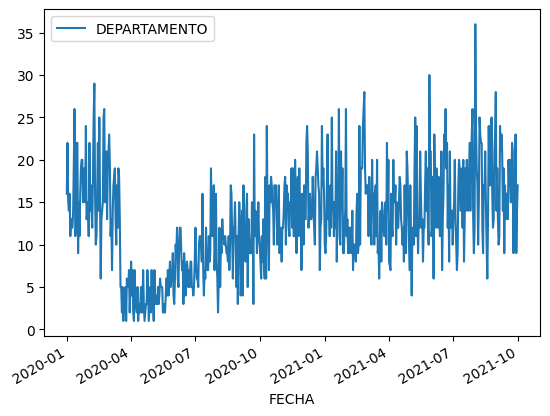

In [129]:
data_t.groupby('FECHA').agg({'DEPARTAMENTO':'count'}).plot()

* Referencias
    * Practical Machine Learning Class  
    * https://nbviewer.org/github/albahnsen/PracticalMachineLearningClass/blob/master/notebooks/02-IntroPython_Numpy_Scypy_Pandas.ipynb

    * Data Science and Machine Learning: Making Data-Driven Decisions| MIT IDSS

    * Pandas: Official Documentation
    * https://pandas.pydata.org/